In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cyl_ecto_network import CylEctoNetwork

In [3]:
def plot_train(train):
    plt.figure(figsize=(20,3))
    plt.plot(train)
    plt.show()

In [4]:
ntwk = CylEctoNetwork(tmax=800,
                      num_cb=100,
                      num_rp=100,
                      num_hyp=30,
                      num_ped=30,
                      gc_cb=500,
                      gc_rp=500,
                      pm_cb=range(30),
                      tau_inh_cb=5,
                      tau_inh_rp=5,
                      a_inh_cb=40,
                      a_inh_rp=40,
                      lambda_d=(.25, .25),
                      seed_cb=123,
                      seed_rp=5)

# modify pacemakers
for pm in ntwk.cbnet.pacemakers:
    neuron = ntwk.cbnet.neurons[pm]
    neuron.k_a = 7500 # 12000
    neuron.k_e = 1000

In [5]:
# cut lines
ntwk.cut(direction='phi', start=0, end=2*np.pi, otherval=.5)

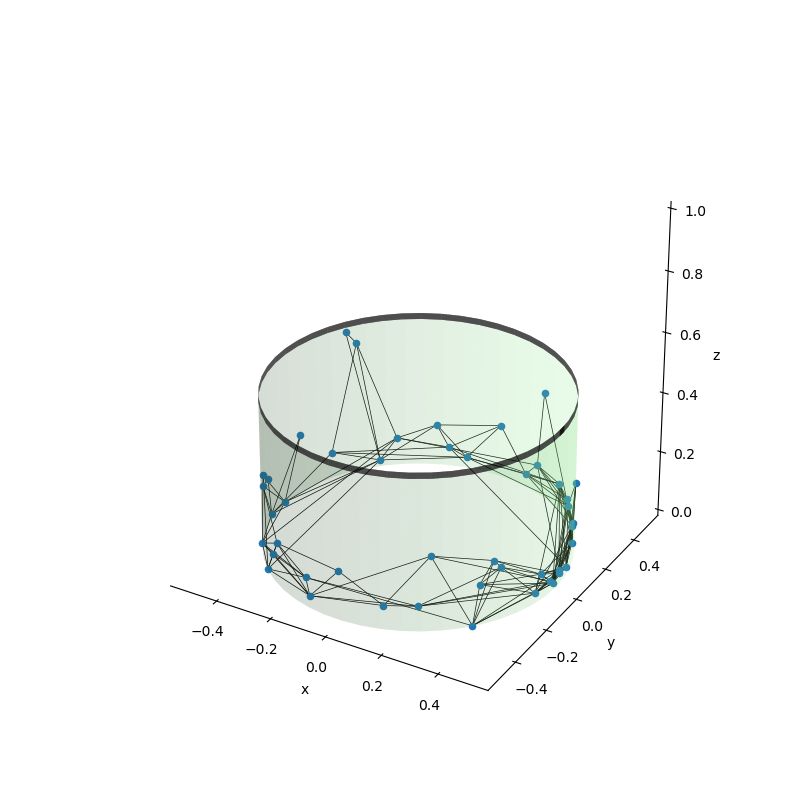

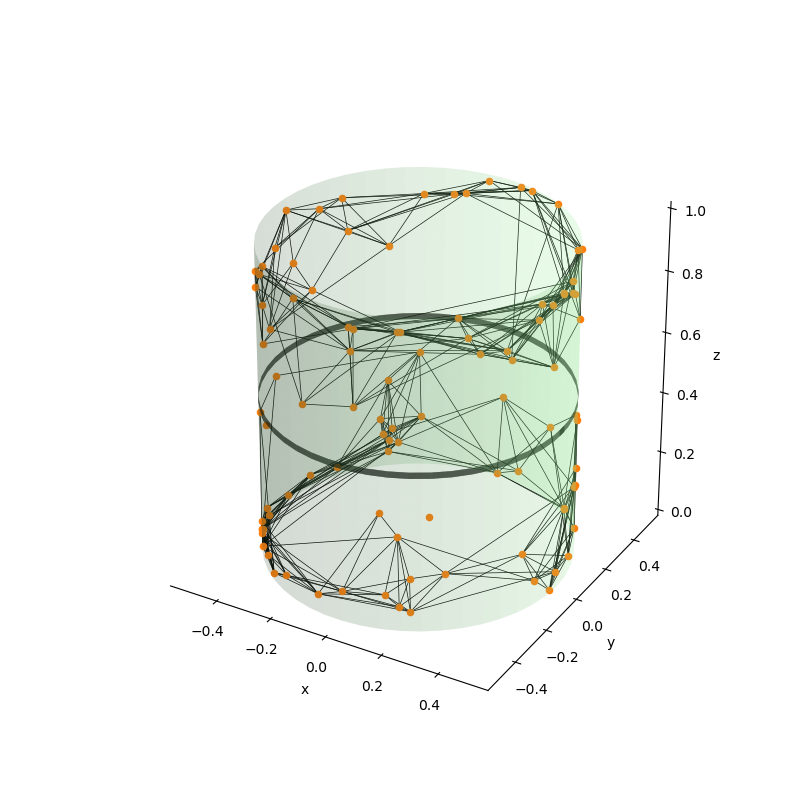

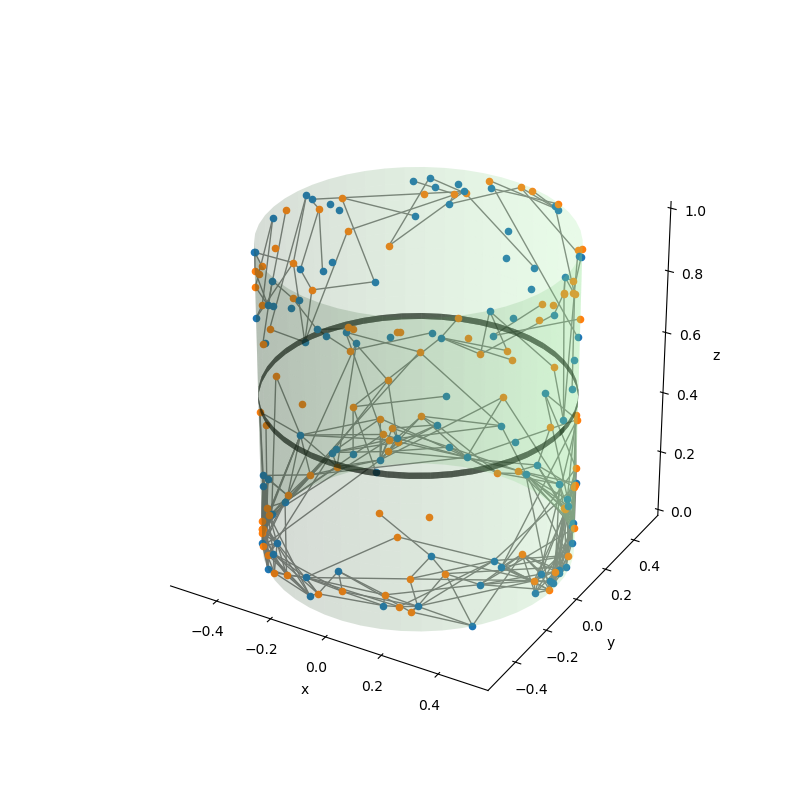

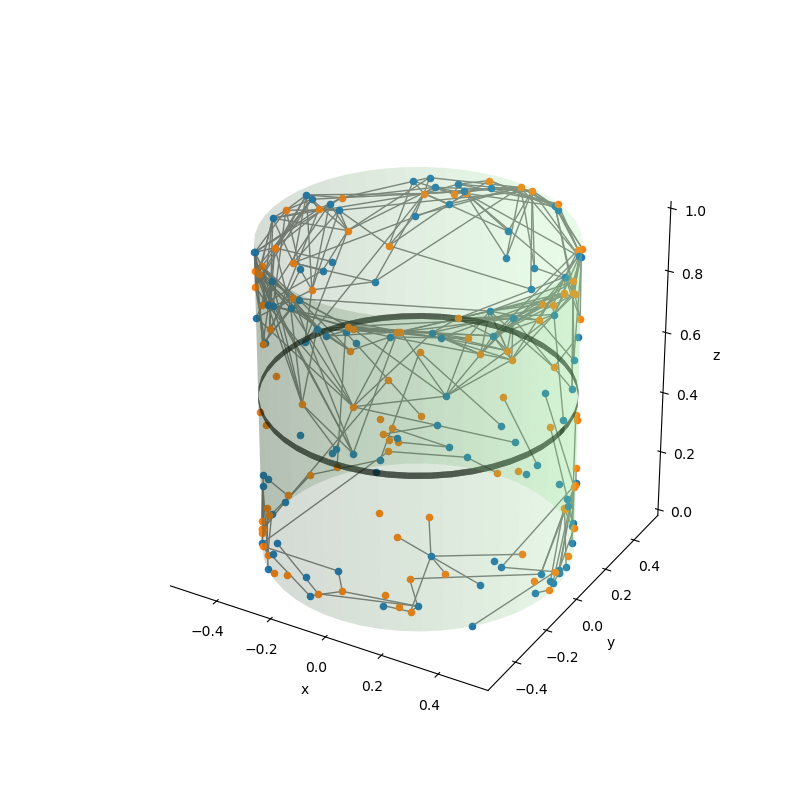

In [10]:
%matplotlib widget
ntwk.disp_network(edge_type='rp_to_cb')
ntwk.disp_network(edge_type='cb_to_rp')
ntwk.disp_network(edge_type='cb', upper_bound=0.5)
ntwk.disp_network(edge_type='rp')

In [7]:
ntwk.run()

100%|██████████████████████████████████████| 79999/79999 [03:11<00:00, 418.11it/s]


In [8]:
# select neurons to plot
indices_cb_ped = []
indices_cb_hyp = []
for i in range(ntwk.cbnet.num):
    if ntwk.cbnet.locations[i][1] < .5:
        indices_cb_ped.append(i)
    else:
        indices_cb_hyp.append(i)
        
indices_rp_ped = []
indices_rp_hyp = []
for i in range(ntwk.rpnet.num):
    if ntwk.rpnet.locations[i][1] < .5:
        indices_rp_ped.append(i)
    else:
        indices_rp_hyp.append(i)

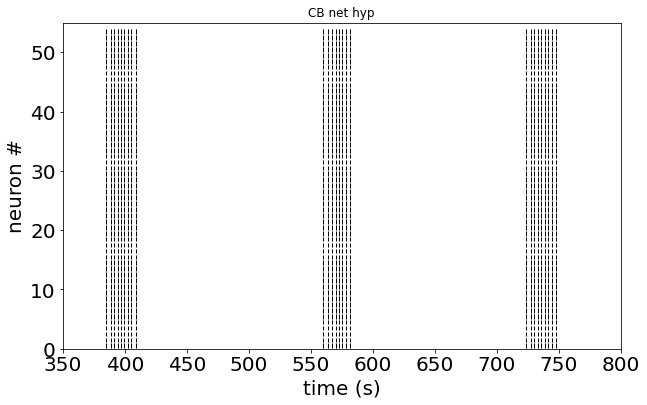

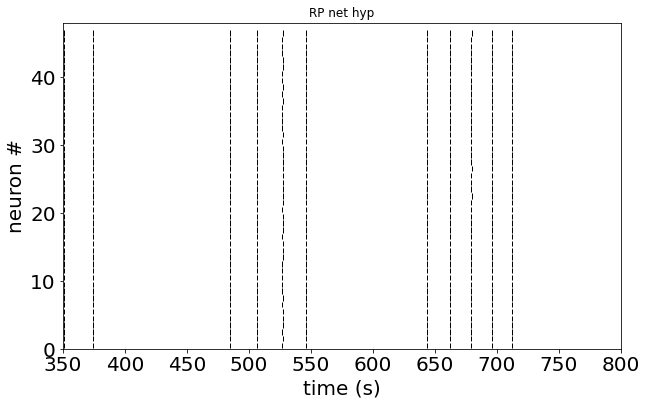

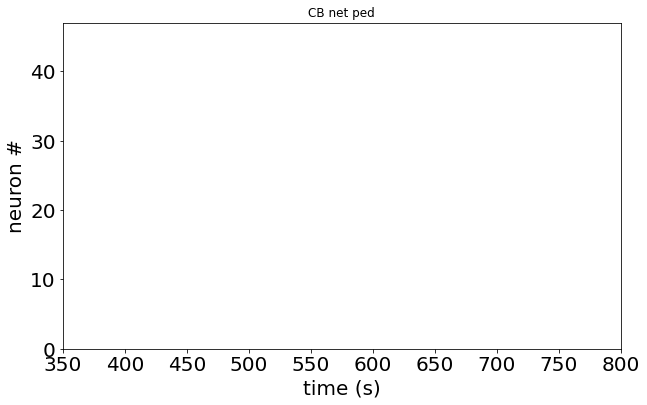

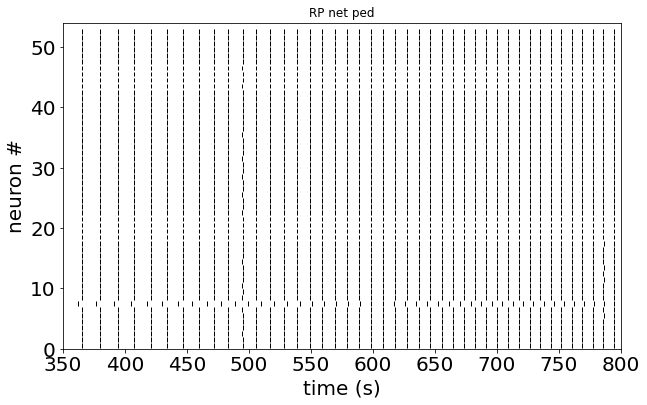

In [14]:
ntwk.cbnet.disp(xlim=(350, 800), title='CB net hyp', indices=indices_cb_hyp)
ntwk.rpnet.disp(xlim=(350, 800), title='RP net hyp', indices=indices_rp_hyp)
ntwk.cbnet.disp(xlim=(350, 800), title='CB net ped', indices=indices_cb_ped)
ntwk.rpnet.disp(xlim=(350, 800), title='RP net ped', indices=indices_rp_ped)

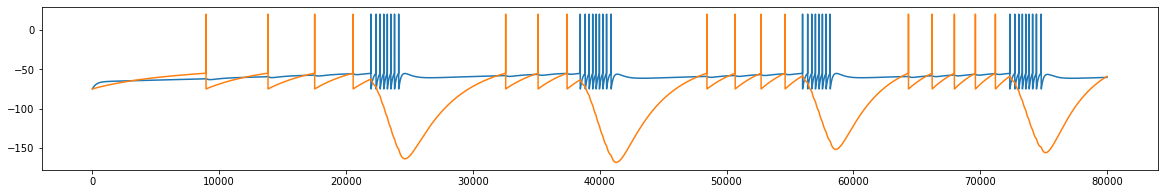

In [15]:
plt.figure(figsize=(20,3))
plt.plot(ntwk.cbnet.neurons[0].v_train)
plt.plot(ntwk.rpnet.neurons[0].v_train)
plt.show()